In [13]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
plt.style.use(['seaborn-darkgrid'])
plt.rcParams['figure.figsize'] = (12, 9)
plt.rcParams['font.family'] = 'DejaVu Sans'

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

RANDOM_STATE = 17

In [14]:
# Se carga el dataset
root = r'C:\Users\Aulamultimedia\MEGA\Especializacion en Inteligencia Artificial UBA\Materias\Bimestre 2\Inteligencia artificial'
X_train = np.loadtxt(os.path.join(root, "X_train.txt"))
y_train = np.loadtxt(os.path.join(root, "y_train.txt")).astype(int)

X_test = np.loadtxt(os.path.join(root, "X_test.txt"))
y_test = np.loadtxt(os.path.join(root, "y_test.txt")).astype(int)

print("Estructura features del dataset: {}".format(X_train.shape))
print("Estructura de las etiquetas: {}".format(y_train.shape))
# Cantidad única de clases
clases = np.unique(y_train)
print('Clases en la variable de salida: ', clases)
# Exploramos un poco las features
df = pd.DataFrame(data=X_train)
df.describe()

Estructura features del dataset: (7767, 561)
Estructura de las etiquetas: (7767,)
Clases en la variable de salida:  [ 1  2  3  4  5  6  7  8  9 10 11 12]


,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
count,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000,...,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000
mean,0.038759,-0.000647,-0.018155,-0.599017,-0.634424,-0.691270,-0.623886,-0.657884,-0.740154,-0.360200,...,0.161745,-0.316548,-0.625132,0.016774,0.018471,0.009239,-0.005184,-0.485936,0.050310,-0.052888
std,0.101996,0.099974,0.089927,0.441481,0.367558,0.321641,0.418113,0.348005,0.272619,0.499259,...,0.237319,0.313899,0.302581,0.331326,0.443540,0.601208,0.477218,0.509278,0.300866,0.276196
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-0.958535,-1.000000,-1.000000,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.987874
25%,0.032037,-0.011209,-0.028448,-0.992140,-0.983570,-0.984661,-0.992902,-0.984131,-0.986661,-0.795613,...,0.020312,-0.548129,-0.843966,-0.108225,-0.261002,-0.470267,-0.373565,-0.810953,-0.047752,-0.140560
50%,0.038975,-0.002921,-0.019602,-0.914202,-0.827970,-0.827696,-0.924421,-0.838559,-0.852735,-0.717007,...,0.170819,-0.353980,-0.710071,0.017627,0.029079,0.001515,-0.005503,-0.706619,0.176777,0.004583
75%,0.044000,0.004303,-0.011676,-0.246026,-0.313069,-0.450478,-0.294903,-0.362671,-0.540521,0.054178,...,0.316240,-0.137462,-0.503837,0.167695,0.314876,0.496871,0.352690,-0.488765,0.246834,0.109507
max,1.000000,1.000000,1.000000,1.000000,0.945956,1.000000,1.000000,0.960341,1.000000,1.000000,...,1.000000,0.938491,0.911653,1.000000,1.000000,0.998702,0.991288,1.000000,0.482229,1.000000


In [15]:
n_clases = clases.size
n_clases

12

## PCA

In [16]:
# Escalamos restando la media y dividiendo el desvío estándar:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Calculamos los componentes PCA que explican el 90% de la varianza
pca = PCA(n_components=0.9, random_state=RANDOM_STATE).fit(X_scaled)
X_pca = pca.transform(X_scaled)
X_test_pca=pca.transform(X_test_scaled)
print('cantidad de componentes PCA que explican el 90% de la varianza: ',X_pca.shape[1])


cantidad de componentes PCA que explican el 90% de la varianza:  64


In [17]:
X_pca.shape

(7767, 64)

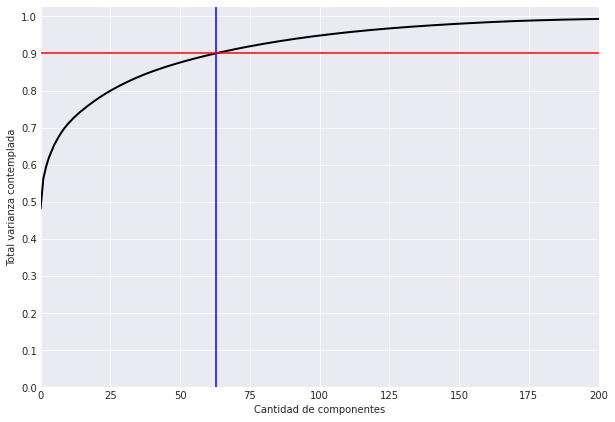

In [18]:
pca_for_graph = PCA(n_components=.999999, random_state=RANDOM_STATE).fit(X_scaled)
plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca_for_graph.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Cantidad de componentes')
plt.ylabel('Total varianza contemplada')
plt.xlim(0, 200)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.axvline(63, c='b')
plt.axhline(0.9, c='r')
plt.show();

C:\Users\AULAMU~1\AppData\Local\Temp/ipykernel_25168/3614000560.py:4: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


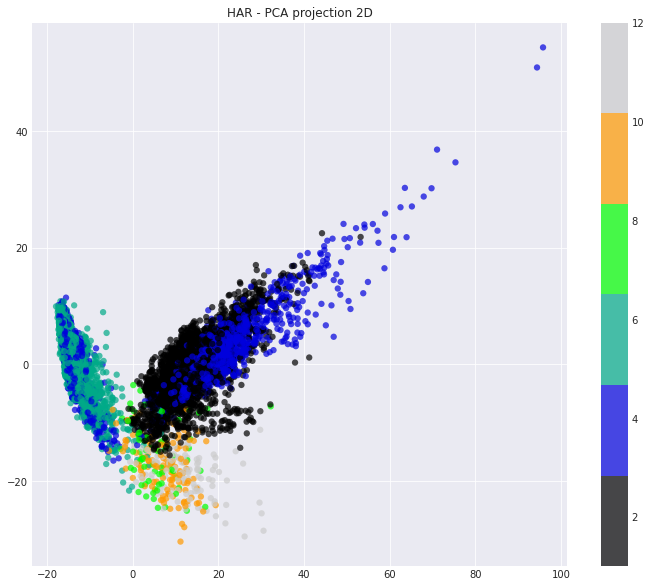

In [19]:
# Graficamos los primeros dos componentes
plt.figure(figsize=(12,10))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, edgecolor='none', alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', 6))
plt.colorbar()
plt.title('HAR - PCA projection 2D');

## Clusterización

In [20]:
# es idéntico al notebook de la clase, ya que está implementado con SKlearn

## Clasificación

In [21]:
# Armamos máscaras para mapear las actividades a reposo (1) o movimiento (0)
# y = {1, 2, 3, 4, 5, 6} => 0, y = {7, 8, 9, 10, 11, 12} => 1 

act_mask = y_train <= 6
st_mask = y_train > 6

act_test_mask = y_test <= 6
st_test_mask = y_test > 6

y_class_train = y_train.copy()
x_class_train = X_pca[:, :64]

y_class_test = y_test.copy()
x_class_test = X_test_pca[:, :64]

y_class_train[act_mask] = 0
y_class_train[st_mask] = 1

y_class_test[act_test_mask] = 0
y_class_test[st_test_mask] = 1

print('Clases en la nueva variable de salida: ', np.unique(y_class_train))
print("Estructura features del dataset de features PCA: {}".format(x_class_train.shape))

Clases en la nueva variable de salida:  [0 1]
Estructura features del dataset de features PCA: (7767, 64)


In [22]:
#Cargamos el modelo
logisticRegr = LogisticRegression()
#Entrenamos el modelo con el dataset de entrenamiento
logisticRegr.fit(x_class_train, y_class_train)

C:\Users\Aulamultimedia\anaconda3\envs\vision1\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [24]:
# Obtenemos el grado de certeza del modelo con el set de entrenamiento y de test
score_test = logisticRegr.score(x_class_test, y_class_test)
print('grado de certeza sobre el set de test: ', score_test)

score_train = logisticRegr.score(x_class_train, y_class_train)
print('grado de certeza sobre el set de entrenamiento ', score_train)

grado de certeza sobre el set de test:  0.9958886780518659
grado de certeza sobre el set de entrenamiento  0.9985837517703103


## Frontera de decisión para el dataset de train 

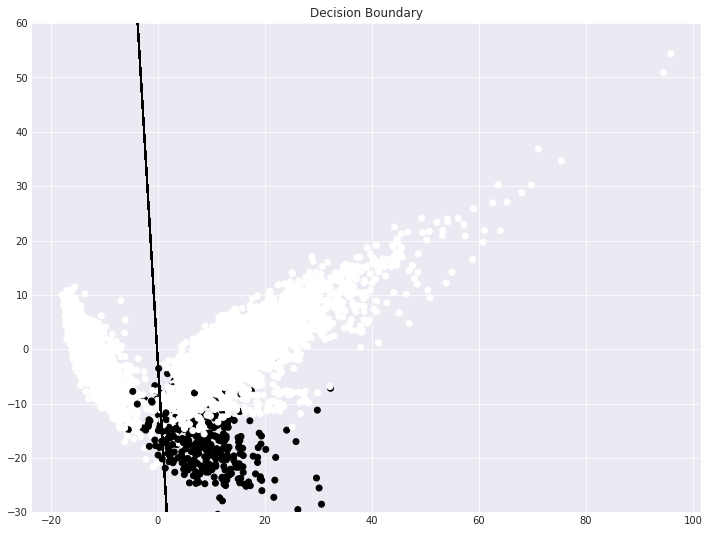

In [56]:
# parametros del modelo.
slope = logisticRegr.intercept_[0]
intercept = logisticRegr.coef_[0][1]/logisticRegr.coef_[0][2]

# Graficos

plt.scatter(x_class_train[:, 0], x_class_train[:, 1], c=y_class_train[:])
y_vals = intercept + (slope * x_class_train[:, 0])
plt.plot(x_class_train[:, 0], y_vals, c="k")
plt.title('Decision Boundary')
plt.ylim((-30, 60))
plt.show()

In [31]:
logisticRegr.intercept_

array([-16.50545595])

In [36]:
logisticRegr.coef_[0][2]

0.3566178333128467

In [54]:
predictions = logisticRegr.predict(x_class_test)
predictions_train= logisticRegr.predict(x_class_train)

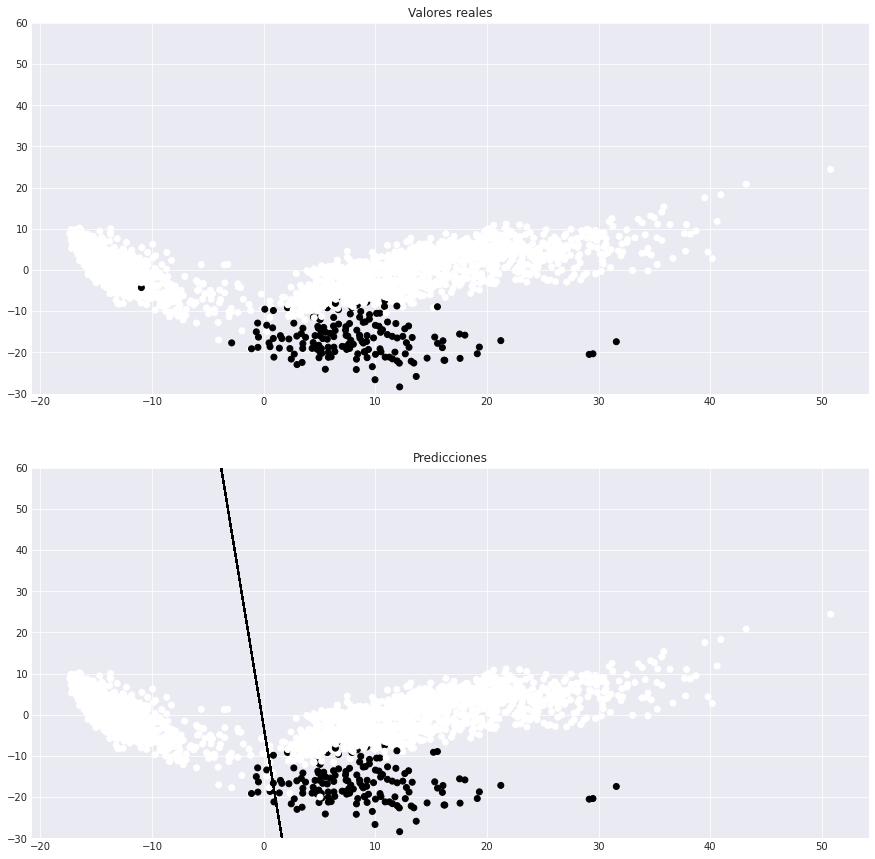

In [62]:
# Graficos

f, (ax, bx) = plt.subplots(2, 1, sharey='col', figsize=(15, 15))

ax.scatter(x_class_test[:, 0], x_class_test[:, 1], c=y_class_test)
ax.set_title('Valores reales')
ax.set_ylim((-30, 60))

bx.scatter(x_class_test[:, 0], x_class_test[:, 1], c=predictions)
y_vals = intercept + (slope * x_class_test[:, 0])
bx.plot(x_class_test[:, 0], y_vals, c="k")
bx.set_title('Predicciones')
bx.set_ylim((-30, 60))

plt.show()

In [60]:
predictions[0]


array([0, 1])